In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.graphics.regressionplots as sgr
from analysis_tools import plot_trend

In [20]:
data = pd.read_csv("results.csv", index_col=0)
data['host'] = 'rapi'
data['watts'] = 2.5*5
more_data = pd.read_csv("tempresults.csv", index_col=0)
more_data['host'] = 'laptop'
more_data['watts'] = 28.86
data = pd.concat([data, more_data[6:]])
data['Ws_per_pi'] = data['watts']*data['time']
data['Ws'] = data['Ws_per_pi']*data['pi_count']
data.groupby(['host','pi_count'])['Ws'].describe()

count          mean         std           min           25%  \
host   pi_count                                                                
laptop 1           3.0   1147.275796   14.011544   1137.500502   1139.249498   
rapi   1           3.0   9612.120856  151.508516   9520.012996   9524.689044   
       2           3.0   9784.869947  313.027715   9423.416811   9694.371223   
       3           3.0  12168.098295  246.946590  11905.379409  12054.416728   
       4           3.0  15038.060637  330.332476  14662.511611  14915.269482   
       5           3.0   9973.609691  283.773569   9660.778821   9853.182092   

                          50%           75%           max  
host   pi_count                                            
laptop 1          1140.998495   1152.163443   1163.328392  
rapi   1          9529.365093   9658.174786   9786.984479  
       2          9965.325636   9965.596515   9965.867394  
       3         12203.454047  12299.457738  12395.461428  
       4         15168.027353  15225.835150  15283.642948  
       5         10045.585364  10130.025126  10214.464888

In [21]:
mod = smf.ols(formula='Ws ~ host:pi_count', data=data)
res = mod.fit()
res.summary()

/home/andrew/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     Ws   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     36.76
Date:                Thu, 15 Mar 2018   Prob (F-statistic):           1.65e-06
Time:                        01:14:25   Log-Likelihood:                -159.92
No. Observations:                  18   AIC:                             325.8
Df Residuals:                      15   BIC:                             328.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              9522.5014   1158.630      8.219      0.000    7052.941     1.2e+04
host[laptop]:pi_count -8375.2256   1600.877     -5.232      0.000   -1.18e+04   -4963.037
host[rapi]:pi_count     597.6168    349.340      1.711      0.108    -146.984    1342.217
==============================================================================
Omnibus:                        0.880   Durbin-Watson:                   0.860
Prob(Omnibus):                  0.644   Jarque-Bera (JB):                0.698
Skew:                           0.438   Prob(JB):                        0.705
Kurtosis:                       2.596   Cond. No.                         13.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(0, 16141.952259402107)

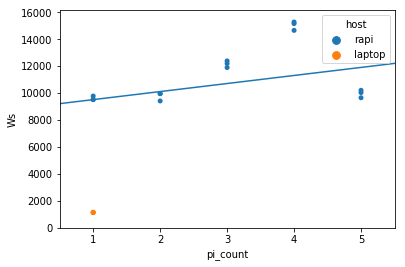

In [24]:
fig, ax = plt.subplots()
sns.stripplot(x='pi_count', y='Ws', hue='host', data=data, ax=ax)
plot_trend(res, 'pi_count', ax)
ax.set_ylim(bottom=0)